<a href="https://colab.research.google.com/github/arcadiopfz/Projeto-Final/blob/main/Etapa_2_Simulacao_Monte_Carlo_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Etapa 2 - Simulação Monte Carlo para previsão de preços da ação da Petro Rio SA (PRIO3)

**negrito**# 1. Importação das bibliotecas e preparação da base de dados

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
prio_df3 = pd.read_csv('/content/prio2.csv')[['Close']]

In [ ]:
prio_df3

,Close
0,0.440000
1,0.407000
2,0.367000
3,0.366000
4,0.378000
...,...
1983,35.490002
1984,35.439999
1985,35.580002
1986,37.250000


In [ ]:
prio_df3_normalizado = prio_df3.copy()
for i in prio_df3:
  prio_df3_normalizado[i] = prio_df3[i] / prio_df3[i][0]
prio_df3_normalizado

,Close
0,1.000000
1,0.925000
2,0.834091
3,0.831818
4,0.859091
...,...
1983,80.659095
1984,80.545452
1985,80.863641
1986,84.659091


In [ ]:
prio_df3_taxa_retorno = np.log(1 + prio_df3_normalizado.pct_change())
prio_df3_taxa_retorno

,Close
0,NaN
1,-0.077962
2,-0.103451
3,-0.002729
4,0.032261
...,...
1983,0.006502
1984,-0.001410
1985,0.003943
1986,0.045868


In [ ]:
prio_df3_taxa_retorno.fillna(0, inplace=True)
prio_df3_taxa_retorno

,Close
0,0.000000
1,-0.077962
2,-0.103451
3,-0.002729
4,0.032261
...,...
1983,0.006502
1984,-0.001410
1985,0.003943
1986,0.045868


# 2. Cálculo do drift

In [ ]:
media = prio_df3_taxa_retorno.mean()
media

Close    0.002232
dtype: float64

In [ ]:
variancia = prio_df3_taxa_retorno.var()
variancia

Close    0.002169
dtype: float64

In [ ]:
drift = media - (0.5 * variancia)
drift

Close    0.001148
dtype: float64

## 2.x. Definindo a Quantidade de dias e simulações

In [ ]:
dias_frente = 30
simulacoes = 100

In [ ]:
desvio_padrao = prio_df3_taxa_retorno.std()
desvio_padrao

Close    0.046572
dtype: float64

In [ ]:
Z = stats.norm.ppf(np.random.rand(dias_frente, simulacoes))

In [ ]:
Z.shape

(30, 100)

In [ ]:
Z

array([[ 1.2474585 , -2.22856531,  0.26449133, ..., -1.87504653,
        -1.99312336, -1.80137339],
       [-1.0256804 , -1.07867235,  0.69459959, ..., -1.48906026,
        -1.97266388, -0.55071699],
       [ 0.45192435,  0.95430679,  0.61309566, ...,  0.6270165 ,
         0.36689461, -0.43279443],
       ...,
       [-0.61012584, -1.11791737, -1.08555397, ..., -0.58330955,
        -1.36883908,  0.77507938],
       [-0.6404183 , -0.09100343, -0.50883957, ...,  0.02712715,
        -0.28526589,  0.50863419],
       [ 0.53251932, -0.10379691,  0.87764938, ..., -0.32458404,
        -0.98204044, -0.02847167]])

In [ ]:
retornos_diarios = np.exp(drift.values + desvio_padrao.values * Z)

In [ ]:
retornos_diarios.shape

(30, 100)

In [ ]:
retornos_diarios

array([[1.06103481, 0.90245028, 1.01355672, ..., 0.91743137, 0.91240016,
        0.9205846 ],
       [0.95444946, 0.95209682, 1.0340641 , ..., 0.93407248, 0.91326995,
        0.97579724],
       [1.02244297, 1.04664721, 1.03014642, ..., 1.0308145 , 1.01840207,
        0.98117098],
       ...,
       [0.97310113, 0.95035824, 0.95179173, ..., 0.97431719, 0.93931699,
        1.03794718],
       [0.97172926, 0.99691422, 0.97770222, ..., 1.00241397, 0.98793557,
        1.02514692],
       [1.02628791, 0.99632041, 1.04291723, ..., 0.98612818, 0.95639127,
        0.99982171]])

# 3. Previsões de preços futuros

In [ ]:
previsoes = np.zeros_like(retornos_diarios)

In [ ]:
previsoes.shape

(30, 100)

In [ ]:
previsoes

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
previsoes[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
prio_df3.tail(1)

,Close
1987,37.209999


In [ ]:
prio_df3.iloc[-1]

Close    37.209999
Name: 1987, dtype: float64

In [ ]:
previsoes[0] = prio_df3.iloc[-1]
previsoes

array([[37.20999908, 37.20999908, 37.20999908, ..., 37.20999908,
        37.20999908, 37.20999908],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
for dia in range(1, dias_frente):
  #print(dia)
  previsoes[dia] = previsoes[dia - 1] * retornos_diarios[dia]

In [ ]:
previsoes.shape

(30, 100)

In [ ]:
previsoes

array([[37.20999908, 37.20999908, 37.20999908, ..., 37.20999908,
        37.20999908, 37.20999908],
       [35.51506345, 35.42752191, 38.4775243 , ..., 34.75683606,
        33.98277408, 36.30941437],
       [36.31212685, 37.08011705, 39.63748379, ..., 35.82785071,
        34.60812748, 35.62574383],
       ...,
       [36.23875472, 53.78974546, 31.85674366, ..., 62.08448467,
        34.6072947 , 38.18548196],
       [35.21425821, 53.623762  , 31.14640899, ..., 62.23435449,
        34.18977732, 39.14572912],
       [36.13996744, 53.42644861, 32.48312656, ..., 61.37105063,
        32.6988044 , 39.13874978]])

# 4. Gráfico das previsões

In [ ]:
len(previsoes)

30

In [ ]:
previsoes.T.shape, previsoes.shape

((100, 30), (30, 100))

In [ ]:
previsoes.T

array([[37.20999908, 35.51506345, 36.31212685, ..., 36.23875472,
        35.21425821, 36.13996744],
       [37.20999908, 35.42752191, 37.08011705, ..., 53.78974546,
        53.623762  , 53.42644861],
       [37.20999908, 38.4775243 , 39.63748379, ..., 31.85674366,
        31.14640899, 32.48312656],
       ...,
       [37.20999908, 34.75683606, 35.82785071, ..., 62.08448467,
        62.23435449, 61.37105063],
       [37.20999908, 33.98277408, 34.60812748, ..., 34.6072947 ,
        34.18977732, 32.6988044 ],
       [37.20999908, 36.30941437, 35.62574383, ..., 38.18548196,
        39.14572912, 39.13874978]])

In [ ]:
figura = px.line(title = 'Previsões do preço das ações - simulações')
for i in range(len(previsoes.T)):
  figura.add_scatter(y = previsoes.T[i], name = i)
figura.show()

4.2. Histograma

In [ ]:
preco_mediano = str(np.percentile(previsoes, 50))
preco_95 = str(np.percentile(previsoes, 5))
preco_99 = str(np.percentile(previsoes, 1))

In [ ]:
preco_mediano

'37.86582123478222'

In [ ]:
preco_95

'28.103680220487078'

In [ ]:
preco_99

'24.276331471103337'

In [ ]:
print(f'''Para a previsão do preço da ação da PRIO.SA nos próximos {dias_frente} dias utilizando o Método de Monte Carlo com {simulacoes} simulações, temos: 

Com 50% de probabilidade, o preço será maior que R$ {preco_mediano}.

Com 95% de probabilidade, o preço será maior que R$ {preco_95}.

Com 99% de probabilidade, o preço será maior que R$ {preco_99}.''')

Para a previsão do preço da ação da PRIO.SA nos próximos 30 dias utilizando o Método de Monte Carlo com 100 simulações, temos: 

Com 50% de probabilidade, o preço será maior que R$ 37.86582123478222.

Com 95% de probabilidade, o preço será maior que R$ 28.103680220487078.

Com 99% de probabilidade, o preço será maior que R$ 24.276331471103337.


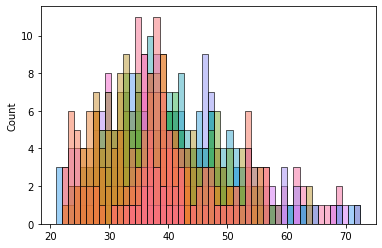

In [ ]:
sns.histplot(data=previsoes, legend=False);

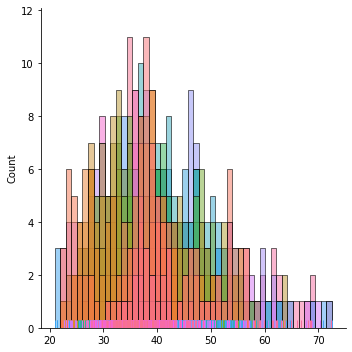

In [ ]:
sns.displot(data=previsoes,rug=True, legend=False);

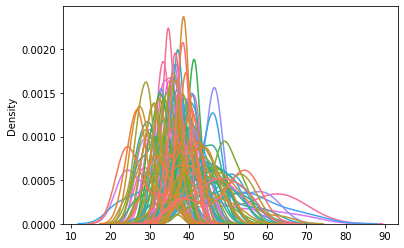

In [ ]:
sns.kdeplot(data=previsoes, legend=False);